In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Set global settings for matplotlib
plt.rcParams.update({
    'figure.facecolor': 'white',  # Set background color to white
    'axes.grid': False,  # Remove grid lines
})

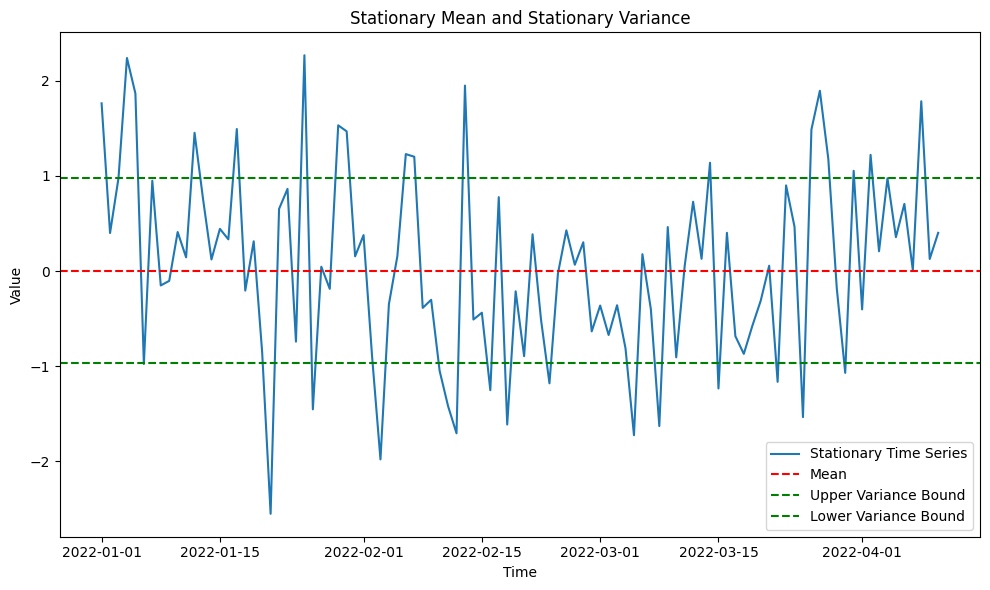

In [26]:
# Generate stationary time series data with constant mean and variance
np.random.seed(0)
n_samples = 100
stationary_data = np.random.normal(loc=0, scale=1, size=n_samples)

# Create a time index
time_index = pd.date_range(start='2022-01-01', periods=n_samples, freq='D')

# Create a pandas DataFrame for the data
df_stationary = pd.DataFrame({'Time': time_index, 'Value': stationary_data})

# Calculate rolling mean and variance
rolling_mean = df_stationary['Value'].rolling(window=7).mean()
rolling_var = df_stationary['Value'].rolling(window=7).var()

# Plot the stationary time series data
plt.figure(figsize=(10, 6), )
plt.plot(df_stationary['Time'], df_stationary['Value'], label='Stationary Time Series')
plt.axhline(y=rolling_mean.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=rolling_mean.mean() + np.sqrt(rolling_var.mean()), color='g', linestyle='--', label='Upper Variance Bound')
plt.axhline(y=rolling_mean.mean() - np.sqrt(rolling_var.mean()), color='g', linestyle='--', label='Lower Variance Bound')
plt.title('Stationary Mean and Stationary Variance')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


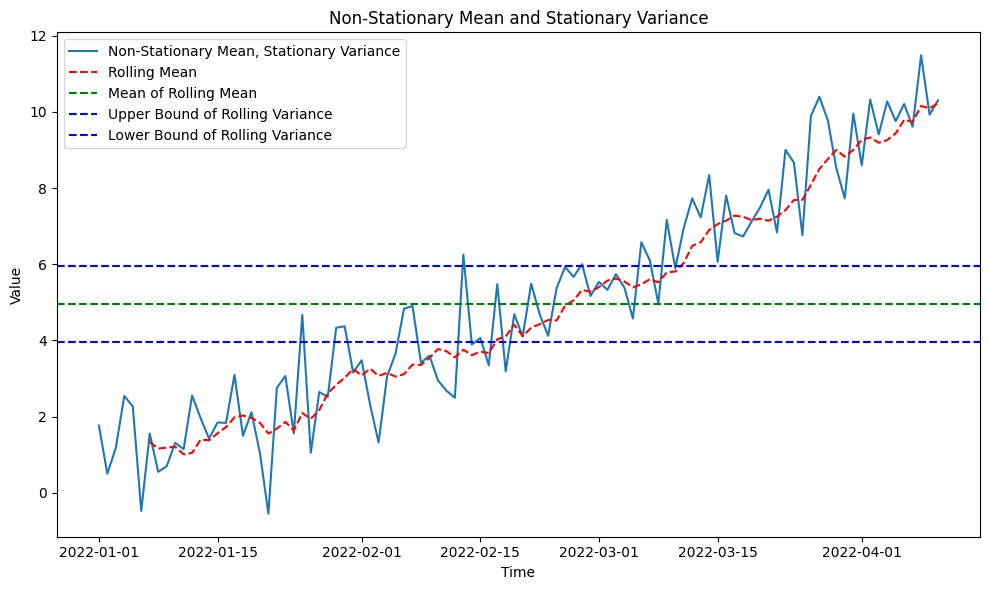

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate non-stationary time series data with varying mean and constant variance
np.random.seed(0)
n_samples = 100
t = np.arange(n_samples)
non_stationary_mean = 0.1 * t  # Varying mean over time
stationary_variance = np.random.normal(loc=0, scale=1, size=n_samples)

# Create time index
time_index = pd.date_range(start='2022-01-01', periods=n_samples, freq='D')

# Create pandas DataFrame for the data
df_non_stationary = pd.DataFrame({'Time': time_index, 'Value': non_stationary_mean + stationary_variance})

# Calculate rolling mean and variance
rolling_mean_non_stationary = df_non_stationary['Value'].rolling(window=7).mean()
rolling_var_non_stationary = df_non_stationary['Value'].rolling(window=7).var()

# Plot the non-stationary mean and stationary variance time series data
plt.figure(figsize=(10, 6))
plt.plot(df_non_stationary['Time'], df_non_stationary['Value'], label='Non-Stationary Mean, Stationary Variance')
plt.plot(df_non_stationary['Time'], rolling_mean_non_stationary, color='r', linestyle='--', label='Rolling Mean')
plt.axhline(y=rolling_mean_non_stationary.mean(), color='g', linestyle='--', label='Mean of Rolling Mean')
plt.axhline(y=rolling_mean_non_stationary.mean() + np.sqrt(rolling_var_non_stationary.mean()), color='b', linestyle='--', label='Upper Bound of Rolling Variance')
plt.axhline(y=rolling_mean_non_stationary.mean() - np.sqrt(rolling_var_non_stationary.mean()), color='b', linestyle='--', label='Lower Bound of Rolling Variance')
plt.title('Non-Stationary Mean and Stationary Variance')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()
